#### *1. Imports libraries*

In [1]:
import fastf1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

##### *1.1 Display all column in df*

In [2]:
# Set display limit columns in the dataframe to 40. To visualize all columns instead of "..." in between them
pd.set_option('display.max_columns', 40)

# set display limit columns in the dataframe to 100. To visualize all rows instead of "..." in between
pd.set_option('display.max_rows', 100)

#### *2. Prepare database*

##### *2.1 Load dataframe*

In [3]:
# file path to the csv file
file_path = "../raw_data/df_all_races.csv"

# load csv file path to a variable
all_races = pd.read_csv(file_path)

##### *2.2 Preprocessing dataframe*

In [4]:
# check each column type
all_races.dtypes

Time                   object
Driver                 object
DriverNumber            int64
LapTime               float64
LapNumber             float64
Stint                 float64
PitOutTime             object
PitInTime              object
Sector1Time           float64
Sector2Time           float64
Sector3Time           float64
Sector1SessionTime    float64
Sector2SessionTime    float64
Sector3SessionTime    float64
SpeedI1               float64
SpeedI2               float64
SpeedFL               float64
SpeedST               float64
IsPersonalBest         object
Compound               object
TyreLife              float64
FreshTyre                bool
Team                   object
LapStartTime           object
LapStartDate           object
TrackStatus             int64
Position              float64
Deleted                  bool
DeletedReason          object
FastF1Generated          bool
IsAccurate               bool
AirTemp               float64
Humidity              float64
Pressure  

In [5]:
# list of columns to be dropped
drop_columns = ['Time', 'DriverNumber', 'PitOutTime', 'PitInTime', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime', 'SpeedI1',
                'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest', 'FreshTyre', 'Team', 'LapStartTime', 
                'LapStartDate', 'TrackStatus', 'Deleted', 'DeletedReason', 'FastF1Generated', 'IsAccurate', 'WindDirection', 'WindSpeed', 'Delta_Lap']

# drope the columns in the list
all_races.drop(columns=drop_columns, inplace=True)

In [6]:
# check for missing values in each column
all_races.isna().sum()

Driver            0
LapTime        1004
LapNumber         0
Stint             0
Sector1Time    1437
Sector2Time     122
Sector3Time     230
Compound          0
TyreLife          0
Position        109
AirTemp           0
Humidity          0
Pressure          0
Rainfall          0
TrackTemp         0
Event_Year        0
GrandPrix         0
dtype: int64

In [7]:
# check different unique values in Position column
print(all_races['Position'].unique())

[ 2.  4.  3. 13.  8.  7. 12. 10.  9. nan  6.  5. 11. 20. 17. 14.  1. 16.
 15. 19. 18.]


In [8]:
# check daframe shape before dropping missing values in Position column
all_races.shape

(67079, 17)

In [9]:
# drop nan in position column
all_races.dropna(subset=['Position'], inplace=True)

# check again dataframe shape to make sure only 109 values (missing) were dropped
all_races.shape

(66970, 17)

In [10]:
# replace null values with the median of the columns
# the following code will not be necessary because we will do it in the Pipeline with SimpleImputer()
"""
numerical_columns = all_races.select_dtypes(include=[np.number]).columns
all_races[numerical_columns] = all_races[numerical_columns].fillna(all_races[numerical_columns].median())
"""

'\nnumerical_columns = all_races.select_dtypes(include=[np.number]).columns\nall_races[numerical_columns] = all_races[numerical_columns].fillna(all_races[numerical_columns].median())\n'

In [11]:
# checking once again if missing values in position column no longer exist
all_races.isna().sum()

Driver            0
LapTime         895
LapNumber         0
Stint             0
Sector1Time    1328
Sector2Time      13
Sector3Time     121
Compound          0
TyreLife          0
Position          0
AirTemp           0
Humidity          0
Pressure          0
Rainfall          0
TrackTemp         0
Event_Year        0
GrandPrix         0
dtype: int64

In [12]:
# Checking different values in each column
for col in all_races:
    print(all_races[col].unique())

['VER' 'GAS' 'PER' 'ALO' 'LEC' 'STR' 'MAG' 'TSU' 'ALB' 'ZHO' 'HUL' 'RIC'
 'OCO' 'NOR' 'HAM' 'MSC' 'SAI' 'LAT' 'RUS' 'BOT' 'VET' 'DEV' 'SAR' 'PIA'
 'LAW' 'COL' 'BEA' 'DOO']
[100.236  97.88   98.357 ...  90.015  87.705  87.731]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72.
 73. 74. 75. 76. 77. 78.]
[1. 2. 3. 4. 5. 6. 7. 8.]
[   nan 31.285 31.499 ... 40.033 18.21  48.961]
[42.325 42.269 42.474 ... 58.714 38.453 38.009]
[24.389 24.326 24.384 ... 32.179 32.043 32.128]
['SOFT' 'MEDIUM' 'HARD' 'INTERMEDIATE' 'WET']
[ 4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.  1.  2.  3. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 

In [13]:
# ceeck different unique values in compound column
print(all_races['Compound'].unique())

['SOFT' 'MEDIUM' 'HARD' 'INTERMEDIATE' 'WET']


In [14]:
# Not necessary, because when we dropped 109 lines due to position = nan, the compound = UNKNOWN was among those lines
"""
flag = all_races['Compound'] == 'UNKNOWN'
all_races[flag]
all_races['Compound'].replace({'UKNOWN': 'MEDIUM'}, inplace=True)
"""

"\nflag = all_races['Compound'] == 'UNKNOWN'\nall_races[flag]\nall_races['Compound'].replace({'UKNOWN': 'MEDIUM'}, inplace=True)\n"

In [15]:
# Replace in the Rainfall column, False -> 0 and Ture -> 1 
all_races['Rainfall'].replace({False: 0, True: 1}, inplace=True)

/tmp/ipykernel_4408/3305322875.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_races['Rainfall'].replace({False: 0, True: 1}, inplace=True)
/tmp/ipykernel_4408/3305322875.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_races['Rainfall'].replace({False: 0, True: 1}, inplace=True)


In [16]:
# Identify categorical and numerical columns
numerical_columns = all_races.select_dtypes(include=[np.number]).columns
categorical_columns = all_races.select_dtypes(include=object).columns

print(f'Numerical columns: \n {numerical_columns}')

print(f'Categorical columns: \n {categorical_columns}')

Numerical columns: 
 Index(['LapTime', 'LapNumber', 'Stint', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'TyreLife', 'Position', 'AirTemp', 'Humidity',
       'Pressure', 'Rainfall', 'TrackTemp', 'Event_Year'],
      dtype='object')
Categorical columns: 
 Index(['Driver', 'Compound', 'GrandPrix'], dtype='object')


##### *2.3  Pre-Visualization*

In [17]:
# define a function to draw a histplot and boxplot graph
def graph(feature):
    # Set up the ppfigure and subplots
    plt.figure(figsize=(16, 6))  # Set the figure size (width, height)

    # Subplot 1: Histogram
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
    sns.histplot(all_races[feature], color='skyblue')  # Create a histogram with KDE
    plt.title(f'Histogram of {feature}', fontsize=16)  # Add a title
    plt.xlabel(f'{feature}', fontsize=14)  # Label the x-axis
    plt.ylabel('Frequency', fontsize=14)  # Label the y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability

    # Subplot 2: Boxplot
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
    sns.boxplot(x=all_races[feature], color='lightgreen')  # Create a boxplot
    plt.title(f'Boxplot of {feature}', fontsize=16)  # Add a title
    plt.xlabel(f'{feature}', fontsize=14)  # Label the x-axis
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability

    # Adjust layout and display the plot
    plt.tight_layout()  # Automatically adjust subplot spacing
    plt.show()

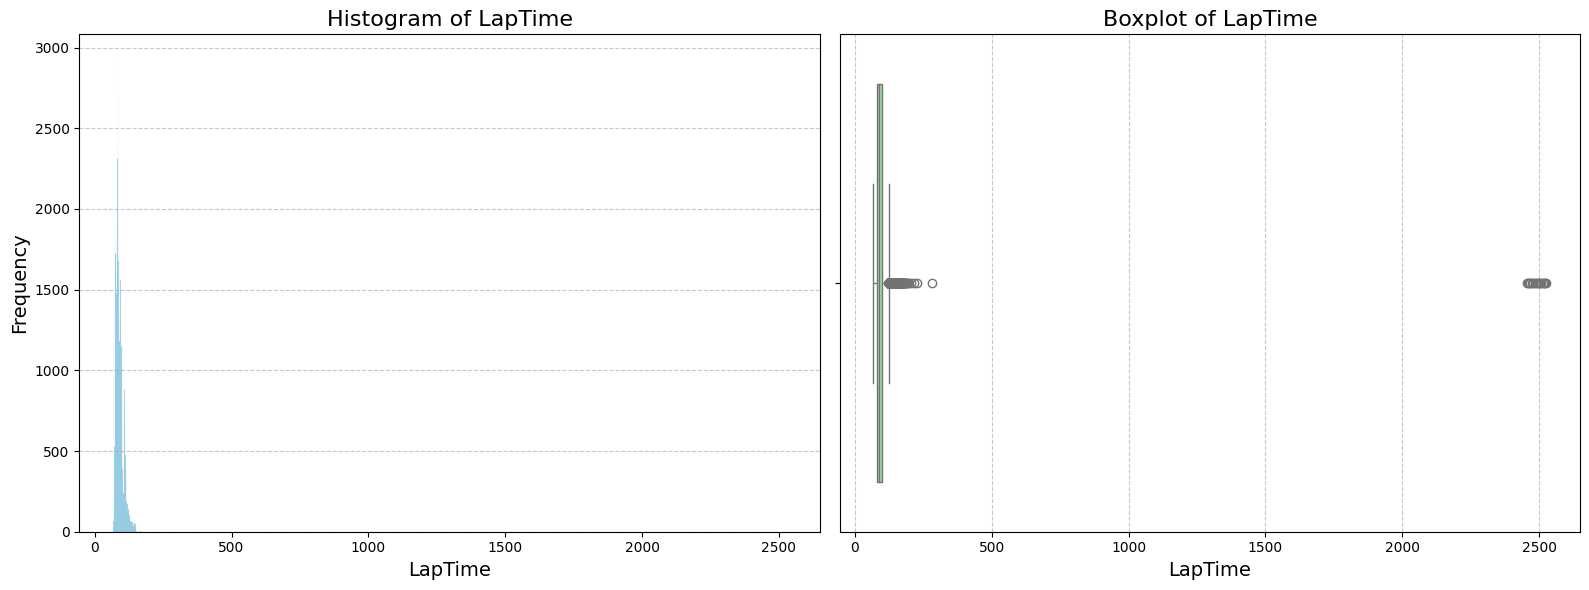

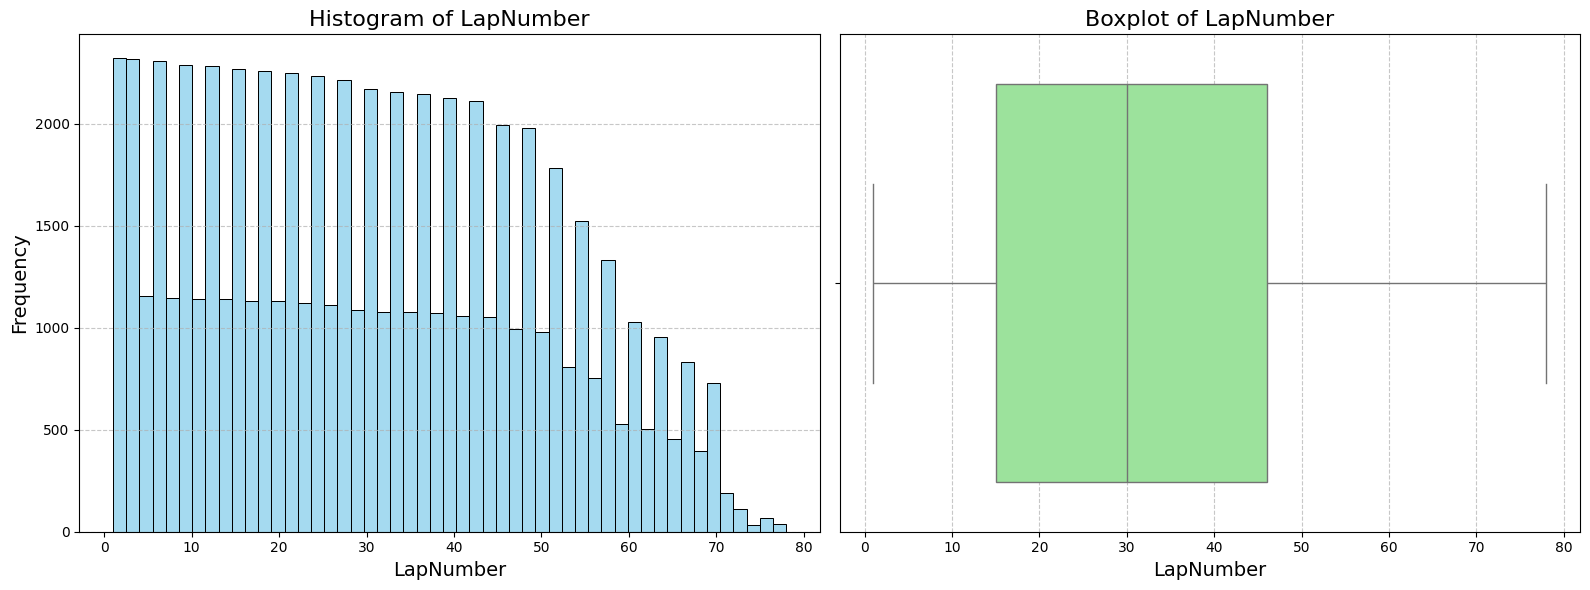

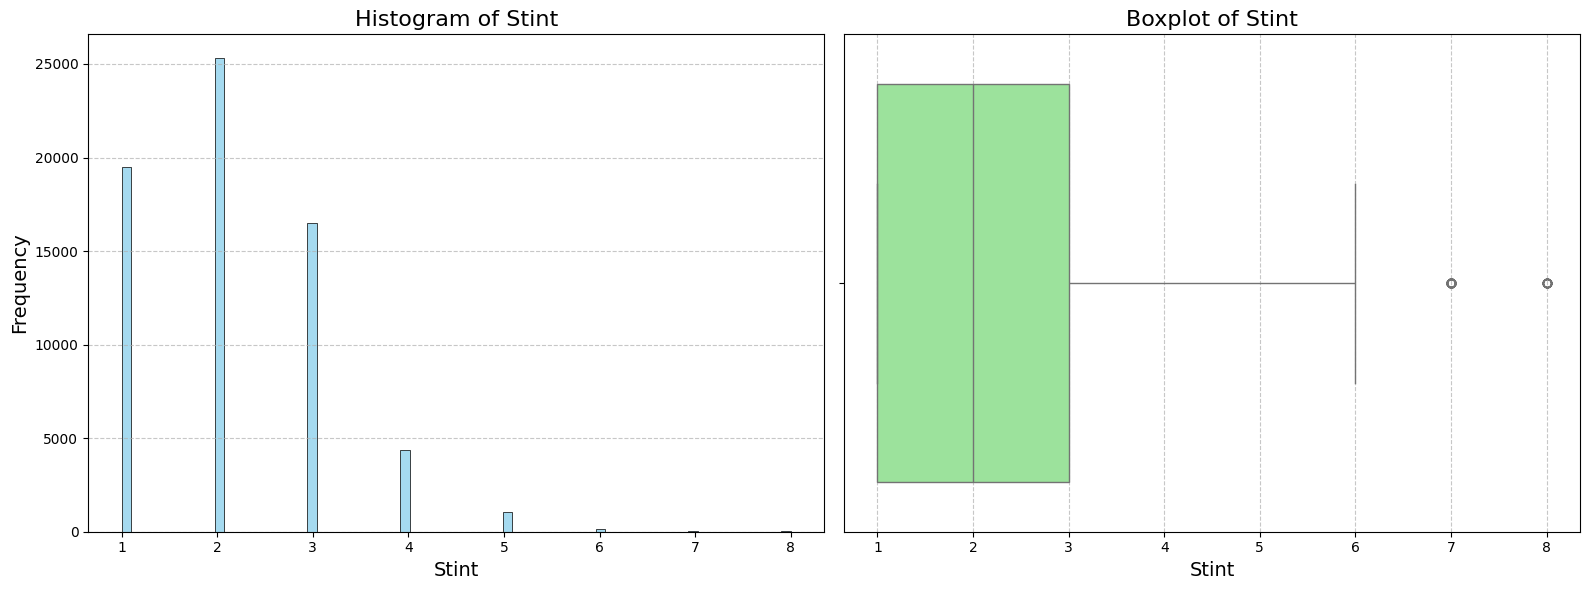

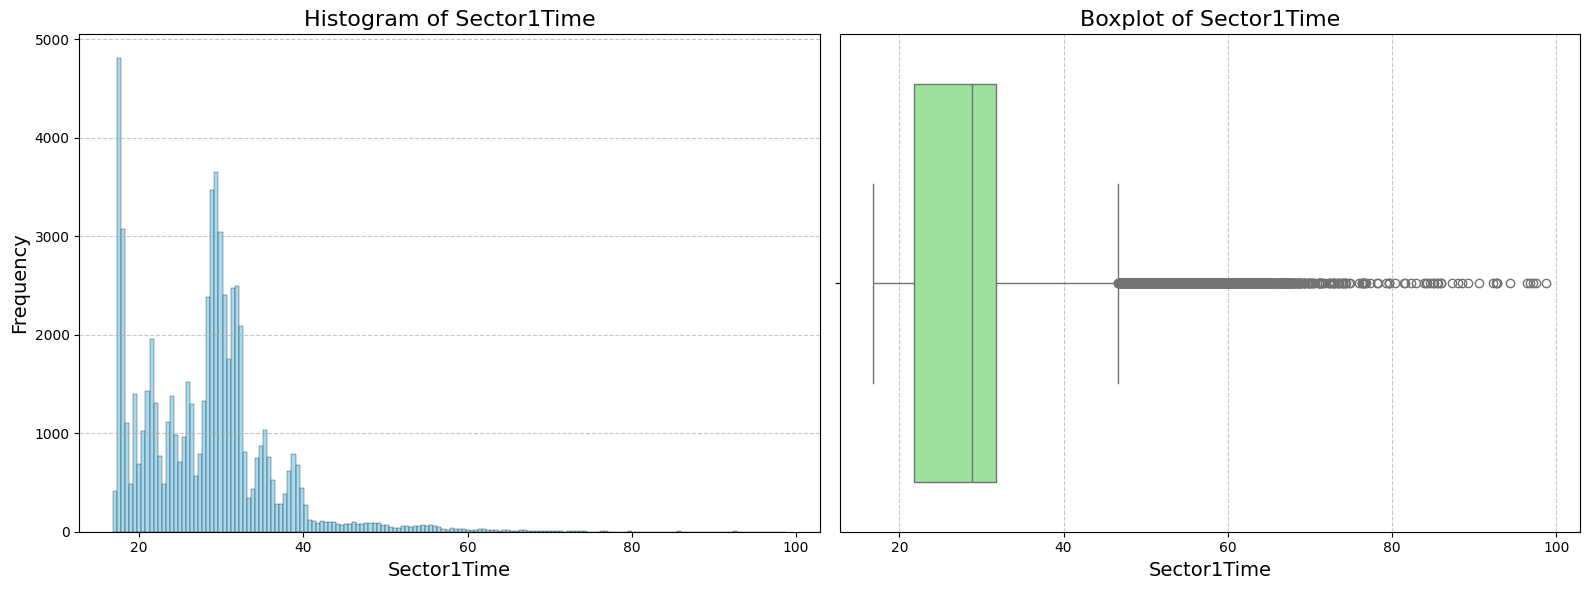

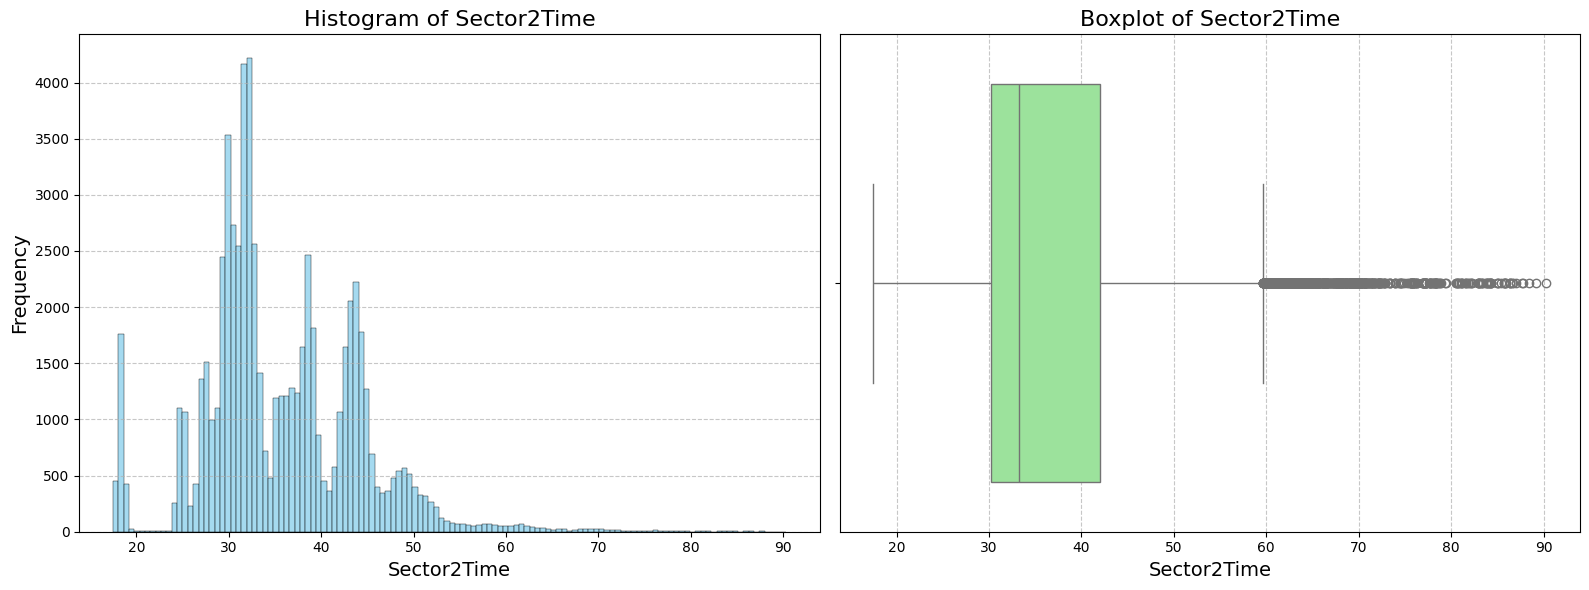

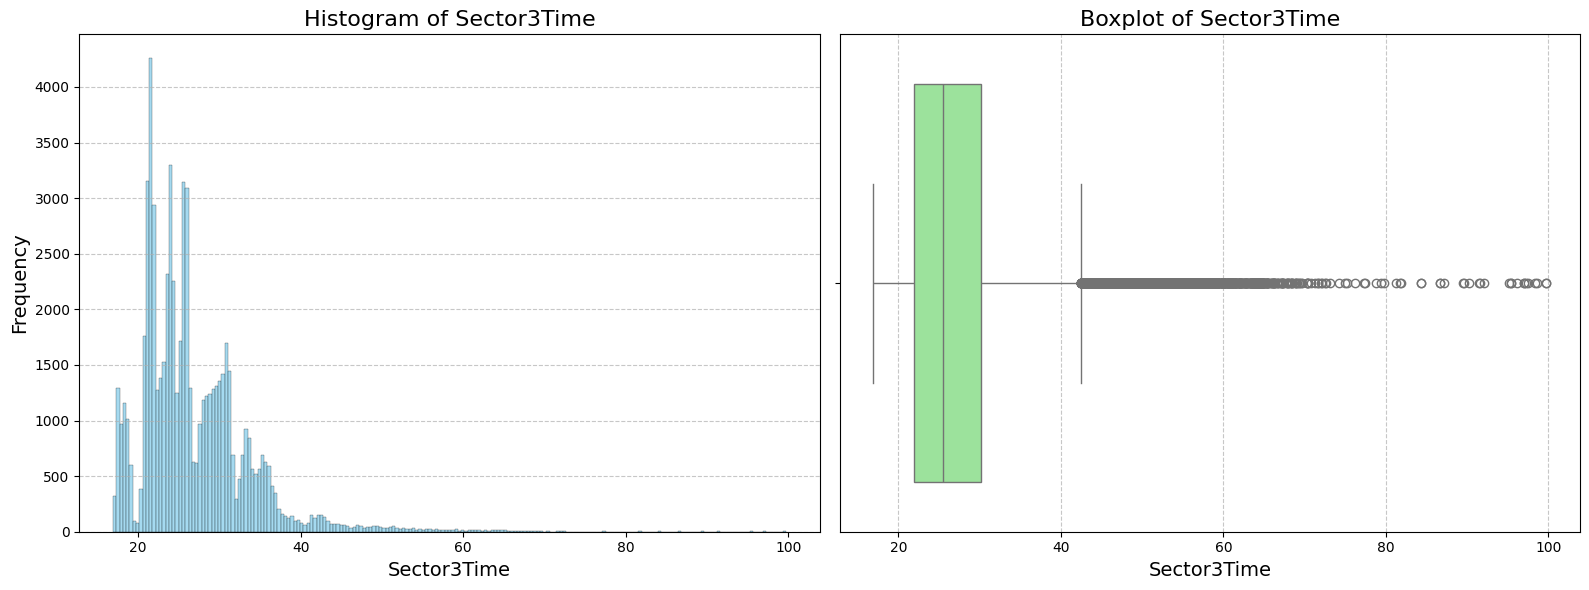

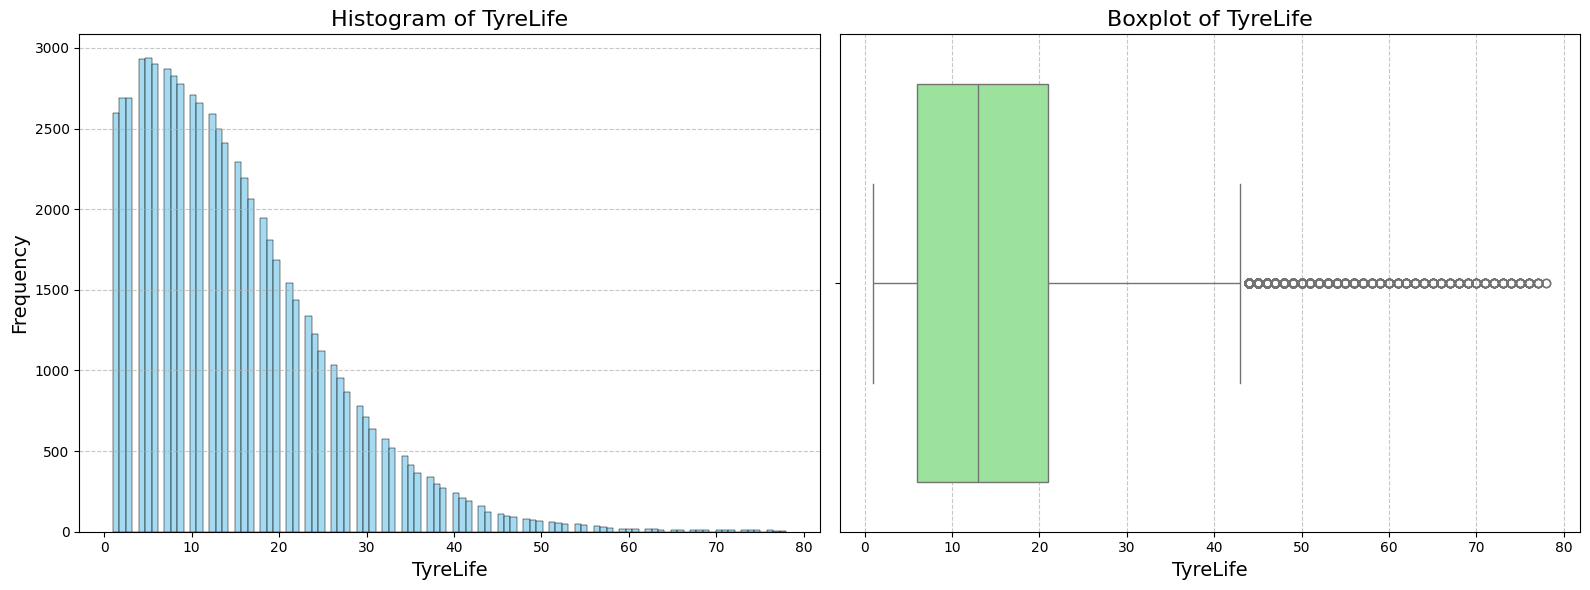

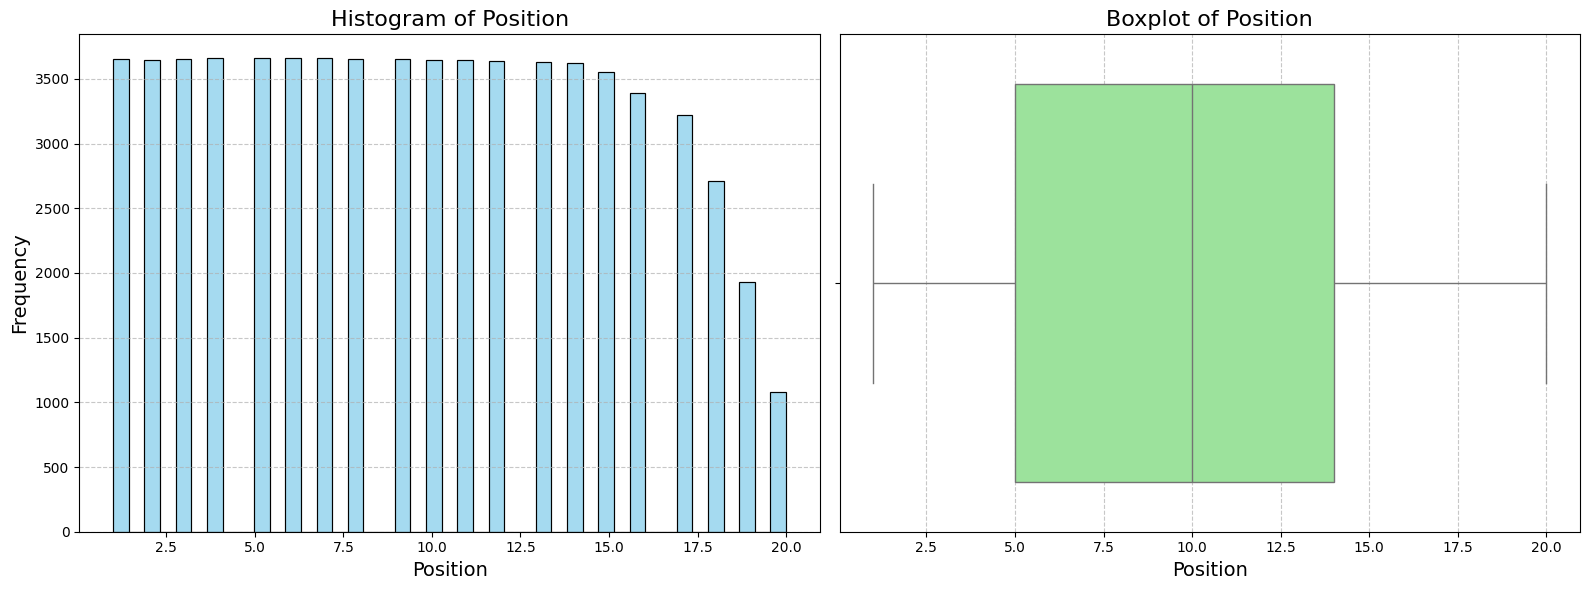

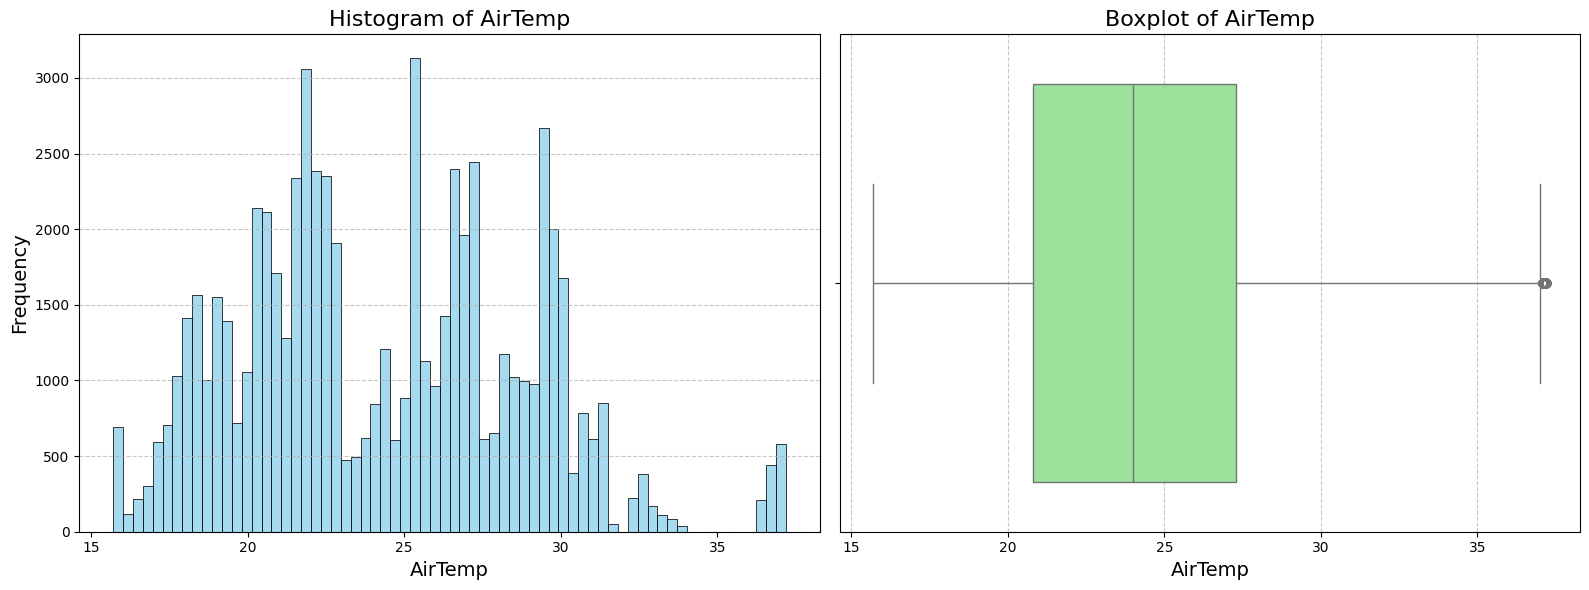

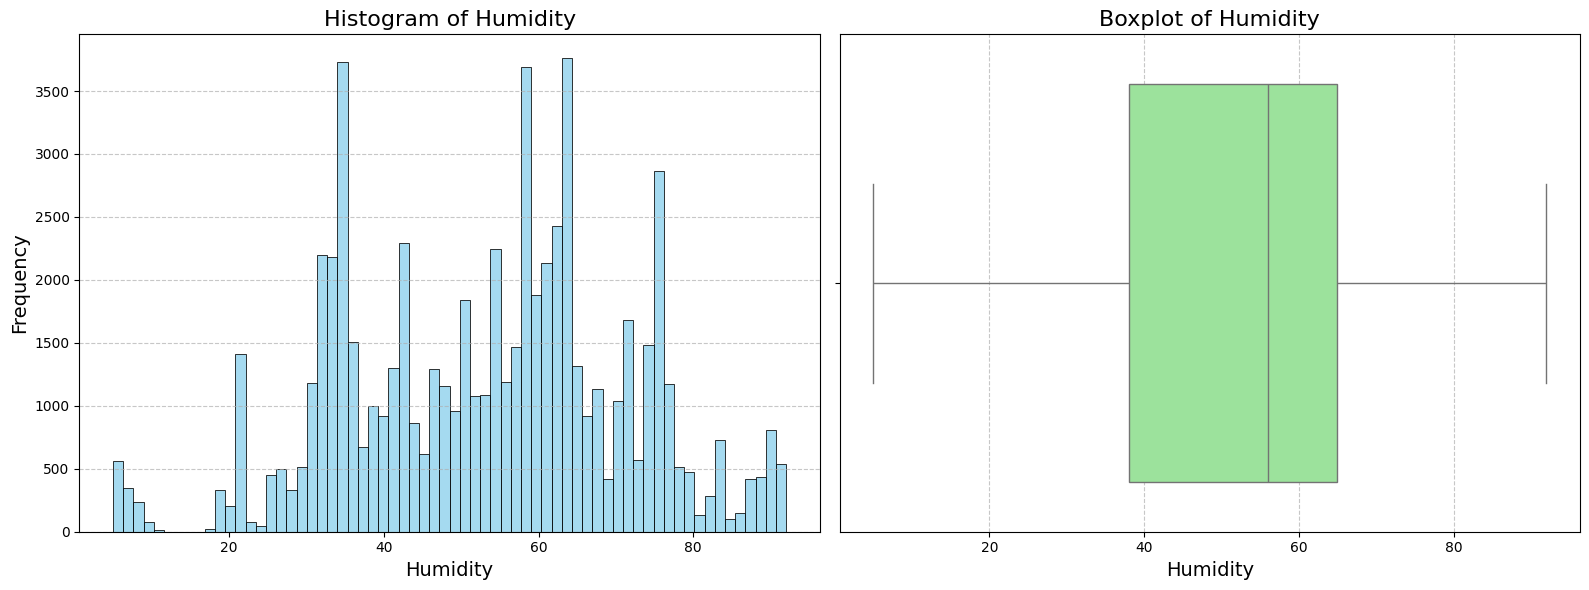

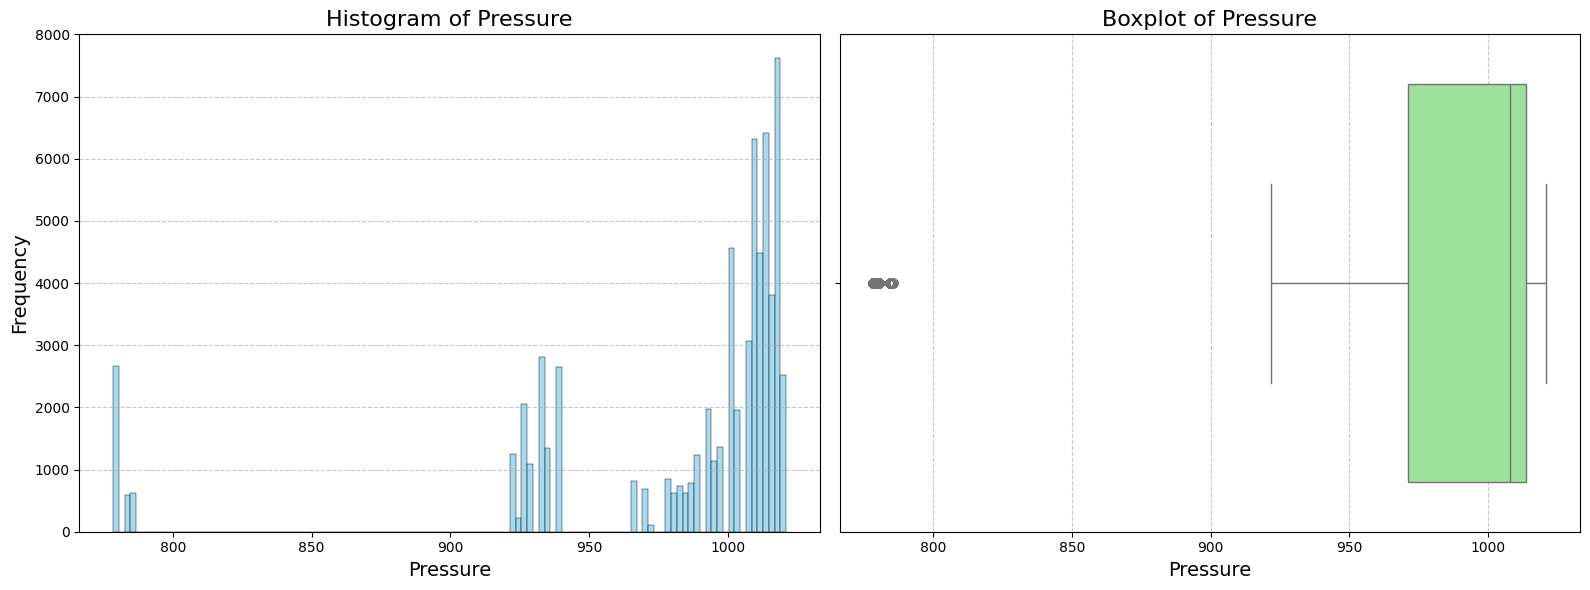

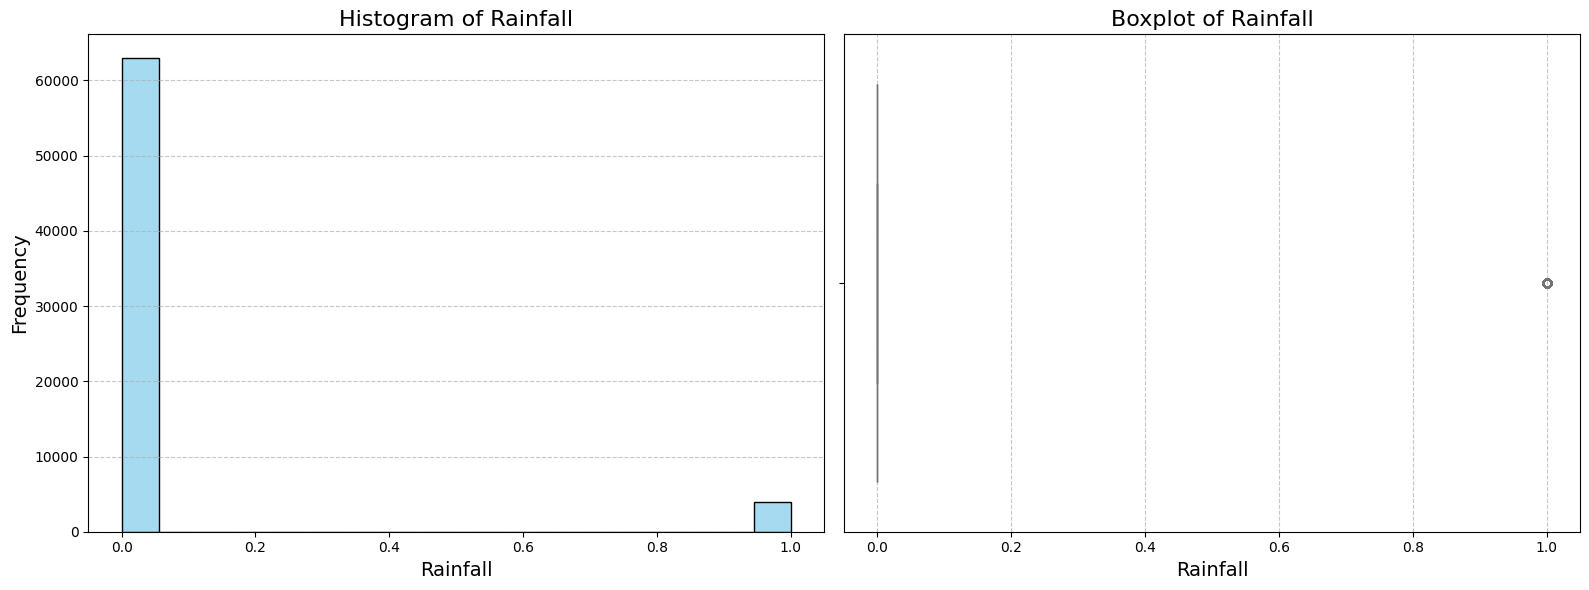

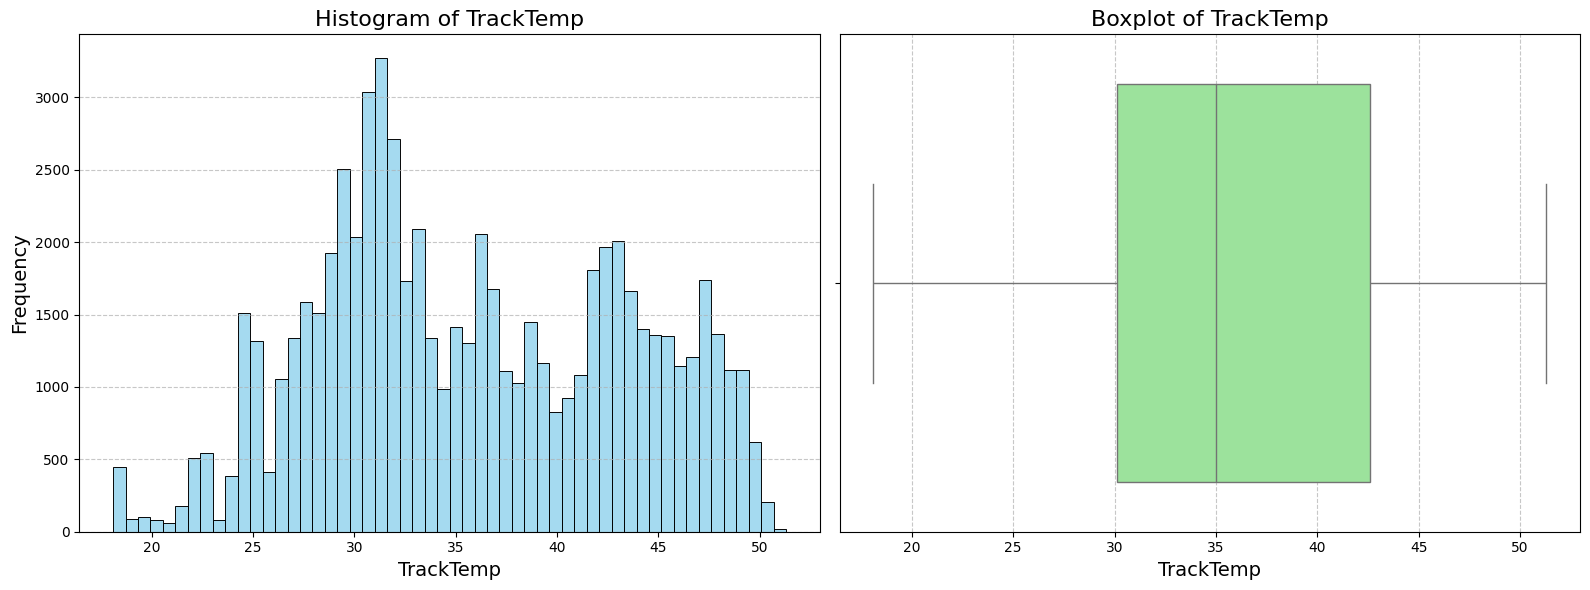

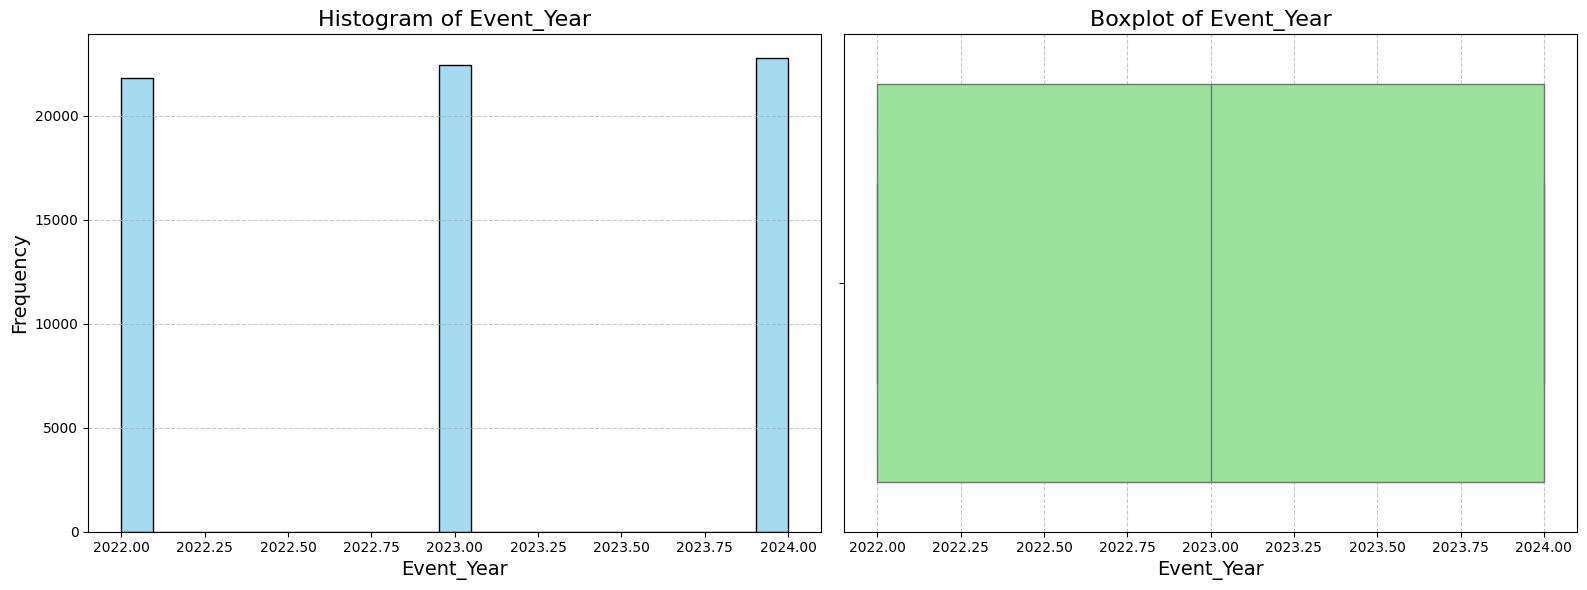

In [18]:
# for each of numerical features draw a histplot and boxplot graph using the function created above
for feature in numerical_columns:
    graph(feature)

##### *2.4 Preprocess for Scaling (Outliers)*

In [19]:
# define a function to exclude outliers before scaling it properly
def exclude_outliers(df, feature):
    """
    Exclude outliers from a feature in a DataFrame using the IQR method.

    """
    # Calculate Q1, Q3, and IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to exclude outliers
    df_filtered = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    
    return df_filtered

In [20]:
# check datafram shape before removing outliers
all_races.shape

(66970, 17)

In [21]:
# remove outliers from LapTime column
all_races = exclude_outliers(all_races, 'LapTime')

# check daframe shape after outliers removed
all_races.shape 

(64065, 17)

In [22]:
# Preprocess LapNumber as Percentage of the race completed

# First, calculate the max lap number for each unique GrandPrix/Event_Year combination
all_races['LapPct'] = all_races['LapNumber'] / all_races.groupby(['Event_Year', 'GrandPrix'])['LapNumber'].transform('max')

# Display a sample
all_races[['Driver','LapNumber','LapPct','Event_Year','GrandPrix']].head()

Driver  LapNumber    LapPct  Event_Year GrandPrix
0    VER        1.0  0.017544        2022   Bahrain
1    VER        2.0  0.035088        2022   Bahrain
2    VER        3.0  0.052632        2022   Bahrain
3    VER        4.0  0.070175        2022   Bahrain
4    VER        5.0  0.087719        2022   Bahrain

In [23]:
# check missing values after dropping outliers
all_races.isna().sum()

Driver           0
LapTime          0
LapNumber        0
Stint            0
Sector1Time    962
Sector2Time      2
Sector3Time      0
Compound         0
TyreLife         0
Position         0
AirTemp          0
Humidity         0
Pressure         0
Rainfall         0
TrackTemp        0
Event_Year       0
GrandPrix        0
LapPct           0
dtype: int64

#### *3. Pipeline*

In [24]:
# StandardScaler Pipeline for numerical features
num_transf_std = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('standard_scaler', StandardScaler())
])

# MinMaxScaler Pipeline for numerical features
nun_transf_minmax = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('minmax_scaler', MinMaxScaler())
])

# RobustScaler Pipeline for numerical features
num_transf_robust = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('robust_scaler', RobustScaler())
])

# RobustScaler & MinMaxSacler Pipeline. Combination of these two methods
num_transf_combined = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('robust_scaler', RobustScaler()),
    ('minmax_scaler', MinMaxScaler())
])

# Categorical features Pipeline that will be encoded using OneHotEncoder 
cat_transformer = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [25]:
# Create a ColumnTransformer to apply OneHotEncoding and StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
       #('num_std', num_transf_std, [numerical_columns]),                   # StandardScale numerical features
        ('num_minmax', nun_transf_minmax, ['Position',
                                           'Stint',
                                           'TyreLife']),                    # MinMaxScale numerical features
        ('num_robust', num_transf_robust, ['AirTemp',
                                           'TrackTemp',
                                           'Humidity',]),                   # RobustScale numerical features
        ('num_combined', num_transf_combined, ['Pressure',
                                               'Sector1Time',
                                               'Sector2Time',
                                               'Sector3Time']),             # Combined two scalers 1° RobustScaler 2° MinMaxScaler
        ('cat', cat_transformer, ['Driver', 'GrandPrix', 'Compound']),      # OneHotEncode categorical features
        ('passthrough_cols', 'passthrough', ['LapTime', 'LapPct'])          # passthrough means nothings will be done in these columns, it wil copy and paste to the output
    ],
    remainder='drop')                                                       # Columns in the original dataframe not mentioned in ColumnTransformer will be dropped

In [26]:
all_races.dtypes

Driver          object
LapTime        float64
LapNumber      float64
Stint          float64
Sector1Time    float64
Sector2Time    float64
Sector3Time    float64
Compound        object
TyreLife       float64
Position       float64
AirTemp        float64
Humidity       float64
Pressure       float64
Rainfall         int64
TrackTemp      float64
Event_Year       int64
GrandPrix       object
LapPct         float64
dtype: object

In [27]:
preprocessor

ColumnTransformer(transformers=[('num_minmax',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmax_scaler',
                                                  MinMaxScaler())]),
                                 ['Position', 'Stint', 'TyreLife']),
                                ('num_robust',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robust_scaler',
                                                  RobustScaler())]),
                                 ['AirTemp', 'TrackTemp', 'Humidity']),
                                ('num_combined',
                                 Pipeline(step...mputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robust_scaler',
                                                  RobustScaler()),
                                                 ('minmax_scaler',
                                                  MinMaxScaler())]),
                                 ['Pressure', 'Sector1Time', 'Sector2Time',
                                  'Sector3Time']),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Driver', 'GrandPrix', 'Compound']),
                                ('passthrough_cols', 'passthrough',
                                 ['LapTime', 'LapPct'])])

##### *3.1 Fit & Transform*

In [28]:
# fit & transform dataframe
fitted_all_races = preprocessor.fit_transform(all_races)

# check dataframe fitted & transformed
fitted_all_races = pd.DataFrame(fitted_all_races, columns=preprocessor.get_feature_names_out())

In [29]:
fitted_all_races.dtypes

num_minmax__Position            float64
num_minmax__Stint               float64
num_minmax__TyreLife            float64
num_robust__AirTemp             float64
num_robust__TrackTemp           float64
num_robust__Humidity            float64
num_combined__Pressure          float64
num_combined__Sector1Time       float64
num_combined__Sector2Time       float64
num_combined__Sector3Time       float64
cat__Driver_ALB                 float64
cat__Driver_ALO                 float64
cat__Driver_BEA                 float64
cat__Driver_BOT                 float64
cat__Driver_COL                 float64
cat__Driver_DEV                 float64
cat__Driver_DOO                 float64
cat__Driver_GAS                 float64
cat__Driver_HAM                 float64
cat__Driver_HUL                 float64
cat__Driver_LAT                 float64
cat__Driver_LAW                 float64
cat__Driver_LEC                 float64
cat__Driver_MAG                 float64
cat__Driver_MSC                 float64


In [30]:
fitted_all_races.shape

(64065, 65)

In [31]:
fitted_all_races.describe()

num_minmax__Position  num_minmax__Stint  num_minmax__TyreLife  \
count          64065.000000       64065.000000          64065.000000   
mean               0.459523           0.163898              0.183710   
std                0.283977           0.140204              0.140078   
min                0.000000           0.000000              0.000000   
25%                0.210526           0.000000              0.077922   
50%                0.473684           0.142857              0.155844   
75%                0.684211           0.285714              0.259740   
max                1.000000           1.000000              1.000000   

       num_robust__AirTemp  num_robust__TrackTemp  num_robust__Humidity  \
count         64065.000000           64065.000000          64065.000000   
mean              0.037554               0.066955             -0.077342   
std               0.666331               0.609730              0.639032   
min              -1.253731              -1.390244             -1.785714   
25%              -0.492537              -0.398374             -0.642857   
50%               0.000000               0.000000              0.000000   
75%               0.507463               0.601626              0.357143   
max               1.955224               1.308943              1.321429   

       num_combined__Pressure  num_combined__Sector1Time  \
count            64065.000000               64065.000000   
mean                 0.831482                   0.201727   
std                  0.239429                   0.126215   
min                  0.000000                   0.000000   
25%                  0.793729                   0.092169   
50%                  0.944719                   0.223874   
75%                  0.969059                   0.275936   
max                  1.000000                   1.000000   

       num_combined__Sector2Time  num_combined__Sector3Time  cat__Driver_ALB  \
count               64065.000000               64065.000000     64065.000000   
mean                    0.348158                   0.158670         0.044268   
std                     0.149486                   0.094869         0.205691   
min                     0.000000                   0.000000         0.000000   
25%                     0.251590                   0.085426         0.000000   
50%                     0.307117                   0.143549         0.000000   
75%                     0.449206                   0.219254         0.000000   
max                     1.000000                   1.000000         1.000000   

       cat__Driver_ALO  cat__Driver_BEA  cat__Driver_BOT  cat__Driver_COL  \
count     64065.000000     64065.000000     64065.000000     64065.000000   
mean          0.051729         0.003512         0.050808         0.004839   
std           0.221481         0.059159         0.219607         0.069394   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           0.000000         0.000000         0.000000         0.000000   
max           1.000000         1.000000         1.000000         1.000000   

       cat__Driver_DEV  cat__Driver_DOO  cat__Driver_GAS  cat__Driver_HAM  \
count     64065.000000     64065.000000     64065.000000     64065.000000   
mean          0.009319         0.000890         0.051276         0.052400   
std           0.096083         0.029815         0.220562         0.222834   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           0.000000         0.000000         0.000000         0.000000   
max           1.000000         1.000000         1.000000         1.000000   

       cat__Driver_HUL  ...  cat

##### *3.2 Train & Test Split*

In [32]:
X = fitted_all_races.drop(columns = ['passthrough_cols__LapTime', 'num_combined__Sector1Time', 'num_combined__Sector2Time', 'num_combined__Sector3Time'])

In [33]:
#X = fitted_all_races.drop(columns = ['passthrough_cols__LapTime'])

In [34]:
y = fitted_all_races['passthrough_cols__LapTime']

In [35]:
y

0        100.236
1         97.880
2         98.357
3         98.566
4         98.877
          ...   
64060     87.731
64061     87.781
64062     87.816
64063     88.554
64064     88.010
Name: passthrough_cols__LapTime, Length: 64065, dtype: float64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42  # TEST = 30%
)

In [37]:
model = GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1,
    max_depth=3
)

In [38]:
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [39]:
result = model.score(X_test, y_test)

In [40]:
result

0.8267380950982003

In [41]:
!pip install tpot

In [42]:
import os
from tpot import TPOTRegressor

/home/mgasilva/.pyenv/versions/3.10.6/envs/f1-tire-prediction/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [47]:
# Instantiate TPOTClassifier
tpot = TPOTRegressor(generations=10, population_size=20, verbose = 2, scorers = ['r2'], n_jobs=-1, cv=2)

# Process autoML with TPOT
tpot.fit(X_train, y_train)

# Print score
print(tpot.score(X_test, y_test))

/home/mgasilva/.pyenv/versions/3.10.6/envs/f1-tire-prediction/lib/python3.10/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44775 instead
  warnings.warn(
Generation:   0%|                                                                                | 0/10 [00:00<?, ?it/s]Process Dask Worker process (from Nanny):
Traceback (most recent call last):
  File "/home/mgasilva/.pyenv/versions/3.10.6/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/mgasilva/.pyenv/versions/3.10.6/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mgasilva/.pyenv/versions/3.10.6/envs/f1-tire-prediction/lib/python3.10/site-packages/distributed/process.py", line 202, in _run
    target(*args, **kwargs)
  File "/home/mgasilva/.pyenv/versions/3.10.6/envs/f1-tire-prediction/lib/python3.10/s

KeyError: "None of [Index(['Eval Error'], dtype='object')] are in the [index]"